# 72 法則

年化報酬率又稱為內部報酬率，（英文：Internal Rate of Return，縮寫：IRR)

假設某間銀行固定年化報酬率為 $8\%$ ，你存 $100$ 塊，過一年後你將會獲得 $108$ 元，那請問大概過幾年你的存款會翻倍。




直覺的想法，一開始假設我有 $1$ 塊錢， $n$ 年以後我有

$$
(1 + \frac{r}{100})^n
$$

，我想要求 $n$ 大概是多少讓 

$$
(1 + \frac{r}{100})^n=2
$$

下面我們用 python 幫我們求答案。 


In [3]:
import sympy

r = sympy.Symbol('r')

n = sympy.log(1 + r/100, 10)/(sympy.log(2, 10))

output = n.series(r, 0, 3)
output


r/(100*log(2)) - r**2/(20000*log(2)) + O(r**3)

In [4]:
import math

100 * math.log(2)


69.31471805599453

推倒過程

- step 1

$$
(1 + \frac{r}{100})^n = 2
$$

- step 2 : 取 log

$$
n \ln (1 + \frac{r}{100}) = \ln 2
$$

- step 3 : 用 $\ln x \sim x$ 在 $0$ 附近 

$$
n \frac{r}{100} \sim n \ln (1 + \frac{r}{100}) = 0.693147
$$

- step 4 : 移項

$$
n = \frac{69.3147}{r}
$$




我們下面看看實際的差距。

In [6]:
import math

def year(r):
    return math.log(2,10)/math.log(1+r/100,10)

year(10)


7.272540897341712

差值最大：  0.280022357182929  差值最小：  -2.339283106425185


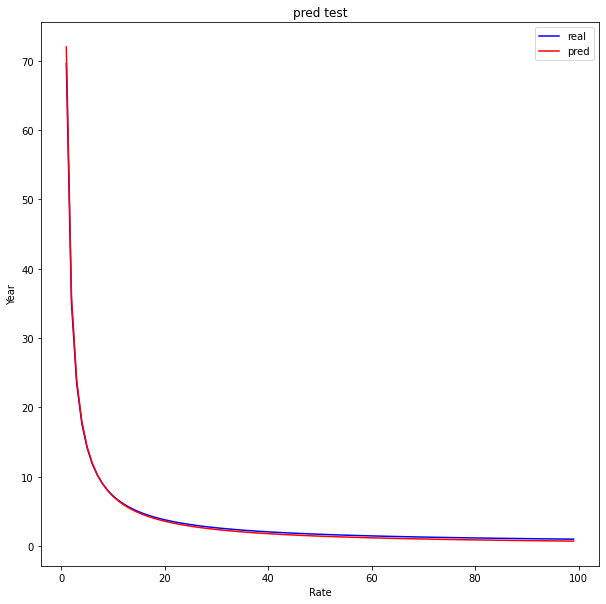

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

r = np.arange(1, 100, 1)
#r = np.arange(5, 10, 0.5)
y_real = np.array([year(rate) for rate in r])
y_pred = np.array([72/rate    for rate in r])

y_diff = y_real - y_pred
print('差值最大： ', y_diff.max(), ' 差值最小： ', y_diff.min())

plt.title("pred test")

plt.plot(r, y_real, color='blue', label='real')
plt.plot(r, y_pred, color='red', label='pred')

plt.xlabel("Rate")
plt.ylabel("Year")

plt.legend() 
plt.show()
